# test area

### load

In [10]:
from pathlib import Path
import os
import seaborn as sb
import pandas as pd
# from datetime import datetime
# from connection_helper import sql

from pandas_plots import tbl, hlp
import duckdb as ddb

hlp.show_package_version(["matplotlib_venn", "dataframe_image", "plotly", "kaleido", "seaborn"], )
df = sb.load_dataset('taxis')

os.environ["RENDERER"] = "svg"
os.environ["THEME"] = "light"

dir_db=Path("C://temp") if hlp.get_os(hlp.OperatingSystem.WINDOWS) else Path(os.path.expanduser("~/tmp"))

file_db_clin = dir_db/'2025-11-11_data_clin.duckdb'

if not file_db_clin.is_file():
    print(f"File does not exist: {file_db_clin}")
    raise FileNotFoundError


🐍 3.12.9 | 📦 matplotlib_venn: 0.11.10 | 📦 dataframe_image: 0.2.7 | 📦 plotly: 6.2.0 | 📦 kaleido: 1.0.0 | 📦 seaborn: 0.13.2 | 📦 pandas: 2.3.1 | 📦 numpy: 1.26.4 | 📦 duckdb: 1.3.2 | 📦 pandas-plots: 0.20.7 | 📦 connection-helper: 0.13.1


In [11]:
_df = df[["distance", "fare", "tip", "tolls"]][:5]
tbl.show_num_df(
    _df,
    data_bar_axis="x",
    pct_axis="xy",
    precision=3,
    total_mode="sum",
)

,distance,fare,tip,tolls,Total
0,1.600 (2.0%),7.000 (8.7%),2.150 (2.7%),0,10.750 (13.3%)
1,0.790 (1.0%),5.000 (6.2%),0,0,5.790 (7.2%)
2,1.370 (1.7%),7.500 (9.3%),2.360 (2.9%),0,11.230 (13.9%)
3,7.700 (9.5%),27.000 (33.4%),6.150 (7.6%),0,40.850 (50.5%)
4,2.160 (2.7%),9.000 (11.1%),1.100 (1.4%),0,12.260 (15.2%)
Total,13.620 (16.8%),55.500 (68.6%),11.760 (14.5%),0,80.880 (100.0%)


## xdd
- lol
  - xdd

In [12]:

con = ddb.connect(file_db_clin, read_only=True)

FILTER_DY = "z_dy between 2020 and 2023"
FILTER_KKR = "z_kkr_label is not null"
FILTER_AGE = "z_ag05 is not null"
FILTER_COLORECTAL = "z_icd10_3d in ('C18','C19','C20')"

FILTERS = [
    (FILTER_DY, ""),
    (FILTER_KKR, ""),
    (FILTER_AGE, ""),
    (FILTER_COLORECTAL, ""),
]

hlp.get_duckdb_filter_n(
    con=con,
    query="from Tumor",
    filters=FILTERS,
    # distinct_metric="z_tum_id",
)


<!-- START_TOKEN -->

counts: rows
---
n = 3_241_401                                        (100.0%) ██████████████████████████████
└ [z_dy between 2020 and 2023]:        n = 2_989_092  (92.2%) ░░░███████████████████████████
└ [z_kkr_label is not null]:           n = 2_989_092  (92.2%) ░░░███████████████████████████
└ [z_ag05 is not null]:                n = 2_989_091  (92.2%) ░░░███████████████████████████
└ [z_icd10_3d in ('C18','C19','C20')]:   n = 226_382   (7.0%) ░░░░░░░░░░░░░░░░░░░░░░░░░░░░██


<!-- END_TOKEN -->

In [13]:
# import dataframe_image as dfi # Needed for the export/convert functions

# 1. Create a basic DataFrame (the 'data base' for the table)
data = {
    'Item': ['Apple', 'Banana', 'Carrot', 'Date'],
    'Sales': [150, 210, 85, 300],
    'Cost': [50, 110, 45, 150]
}
df = pd.DataFrame(data)

# 2. Style the DataFrame with Data Bars
# Apply a background gradient to 'Cost' and data bars to 'Sales'
styled_df = df.style.background_gradient(subset=['Cost'], cmap='Purples').bar(
    subset=['Sales'], # Apply the bar only to the 'Sales' column
    color='#5fba7d',  # Set the color of the bars (a shade of green)
    align='zero'      # Bars start from the left edge of the cell
)

# 3. Example of how to display it (in a Jupyter environment)
styled_df

,Item,Sales,Cost
0,Apple,150,50
1,Banana,210,110
2,Carrot,85,45
3,Date,300,150


In [14]:
con = ddb.connect(file_db_clin, read_only=True)

## lol
- xd
  - xdd
- lolez
  - rofl

- **Filter**
  - `z_icd10`: C50, D05
  - `z_sex`: w
  - `z_dy`: 2020 - 2023

- **Metriken**
  - es werden **Tumore** gezählt, jede 1:n Information (z.B. Behandlungen) gibt es nur einmal pro Tumor

In [15]:
# print("some foo text")
db = con.from_df(df)

# display(Markdown("<!-- START_TOKEN -->"))
tbl.descr_db(db, caption="taxis",)
# display(Markdown("<!-- END_TOKEN -->"))


<!-- START_TOKEN -->

🗄️ taxis	4, 3
	("Item, Sales, Cost")


<!-- END_TOKEN -->

┌─────────┬───────┬───────┐
│  Item   │ Sales │ Cost  │
│ varchar │ int64 │ int64 │
├─────────┼───────┼───────┤
│ Apple   │   150 │    50 │
│ Banana  │   210 │   110 │
│ Carrot  │    85 │    45 │
└─────────┴───────┴───────┘



In [16]:
db_ops_kkr = con.sql("""--sql
    select
            z_kkr_label,
            ops.Code as ops_code,
            count(distinct OPSId) as cnt_ops,
            dim_ops.name as ops_name,
    from Tumor tum
    left join OP op on tum.z_tum_id = op.z_tum_id
    left join OPS ops on op.OPId = ops.OP_TypId
    left join dim_ops on dim_ops.code = ops.Code
    group by ops_code, z_kkr_label, ops_name
    """)
# tbl.descr_db(db_ops_kkr, "ops_kk")

# print(db_ops_kkr.aggregate("ops_code || ' - ' || ops_name as ops, sum(cnt_ops)::int as cnt_ops").order("cnt_ops desc").limit(10).to_df())
db_ops_kkr.aggregate("ops_code || ' - ' || ops_name as ops, sum(cnt_ops)::int as cnt_ops").order("cnt_ops desc").limit(10).show(max_width=145)
db_ops_kkr.aggregate("left(ops_code || ' - ' || ops_name,150) as ops, sum(cnt_ops)::int as cnt_ops").order("cnt_ops desc").limit(10).show()

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬─────────┐
│                                                                 ops                                                                 │ cnt_ops │
│                                                               varchar                                                               │  int32  │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│ NULL                                                                                                                                │  165429 │
│ 5-401.11 - Exzision einzelner Lymphknoten und Lymphgefäße: Axillär: Mit Radionuklidmarkierung (Sentinel-Lymphonodektomie)           │  135826 │
│ 5-573.40 - Transurethrale Inzision, Exzision, Destruktion und Resektion von (erkranktem) Gewebe der Harnblase: Resektion: 

In [17]:
# display(Markdown("<!-- START_TOKEN -->"))
hlp.get_duckdb_filter_n(
    con=con,
    query="from Tumor",
    filters=FILTERS,
    # distinct_metric="z_tum_id",
)
# display(Markdown("<!-- END_TOKEN -->"))

<!-- START_TOKEN -->

counts: rows
---
n = 3_241_401                                        (100.0%) ██████████████████████████████
└ [z_dy between 2020 and 2023]:        n = 2_989_092  (92.2%) ░░░███████████████████████████
└ [z_kkr_label is not null]:           n = 2_989_092  (92.2%) ░░░███████████████████████████
└ [z_ag05 is not null]:                n = 2_989_091  (92.2%) ░░░███████████████████████████
└ [z_icd10_3d in ('C18','C19','C20')]:   n = 226_382   (7.0%) ░░░░░░░░░░░░░░░░░░░░░░░░░░░░██


<!-- END_TOKEN -->

🔵 *** df: <unknown> ***  
🟣 shape: (4, 3)
🟣 duplicates: 0  
🟠 column stats all (dtype | uniques | missings) [values]  
- index [0, 1, 2, 3,]  
- Item (object | 4 | 0 (0%)) ['Apple', 'Banana', 'Carrot', 'Date',]  
- Sales (int64 | 4 | 0 (0%)) [85, 150, 210, 300,]  
- Cost (int64 | 4 | 0 (0%)) [45, 50, 110, 150,]  

🟠 column stats numeric  

column (n = 4) | present  | min | lower |   q25   | median  |  mean   |   q75   | upper | max |  std   |  cv  
---------------+----------+-----+-------+---------+---------+---------+---------+-------+-----+--------+------
Sales          | 4 (100%) |  85 |    85 | 133.750 | 180.000 | 186.250 | 232.500 |   300 | 300 | 91.413 | 0.491
Cost           | 4 (100%) |  45 |    45 |  48.750 |  80.000 |  88.750 | 120.000 |   150 | 150 | 50.394 | 0.568



,Item,Sales,Cost
0,Apple,150,50
1,Banana,210,110
2,Carrot,85,45


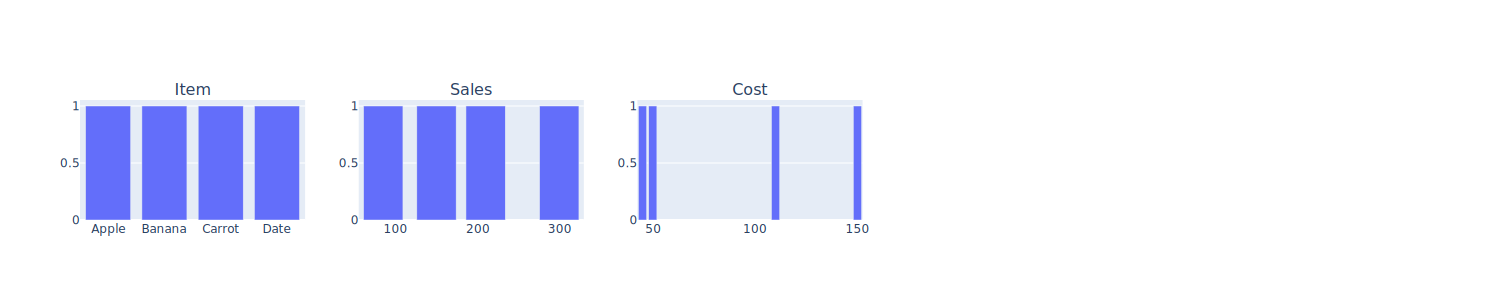

In [18]:
tbl.describe_df(df)